In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pylab as pylab

In [2]:
%matplotlib ipympl

In [3]:
#Change font sizes
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [4]:
# Read file
f = open("D-burning-ages.txt", "r")
lines = f.readlines()

mm = np.zeros(len(lines)-1)
tm = np.zeros(len(lines)-1)
for i, line in enumerate(lines[1:]):   #exclude titles
    tm[i],mm[i] = line.split()

In [5]:
#Feed fit
#I obtained the coefficients from elsewhere (Excel)
#I fitted y=a*x+b with x=log10(mm) and y=log10(tm)
a   = -1.17016445
b   =  4.797025937
e_a =  0.054633816
e_b =  0.03084428

#Convert to linear
# t = 10**b * m**a
mf = np.arange(0.08,0.67,0.001)
tf = np.zeros(len(mf))
for i in range(len(mf)):
    tf[i] = math.pow(mf[i], a)*math.pow(10,b)


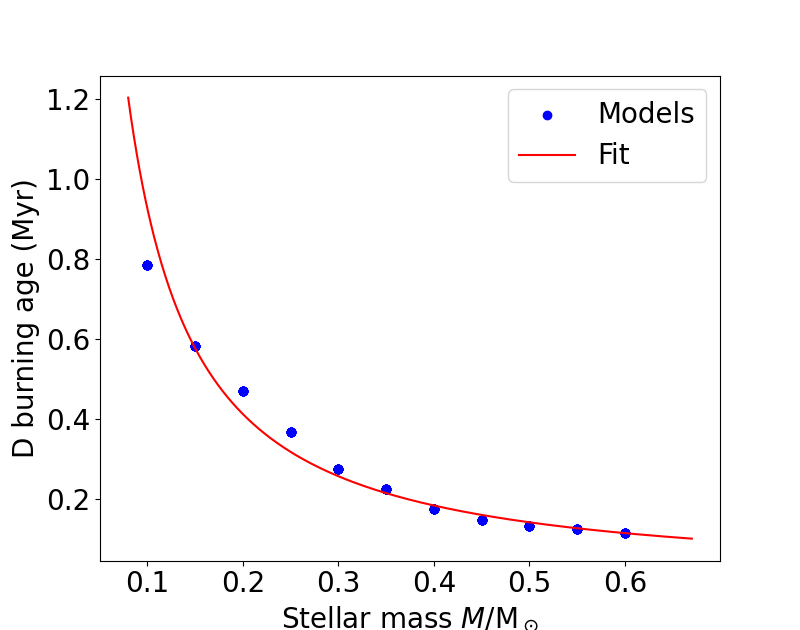

In [6]:
#Plot linear
plt.figure(figsize=(8,6.3))

plt.xlabel(r"Stellar mass $M/$M$_\odot$", fontsize=20)
plt.ylabel(r"D burning age (Myr)", fontsize=20)
plt.scatter(mm, tm/1e6, label="Models", color="blue")
plt.plot(mf, tf/1e6, c="red", label="Fit")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig("Dburning_linear.jpg",dpi=300)
plt.show()

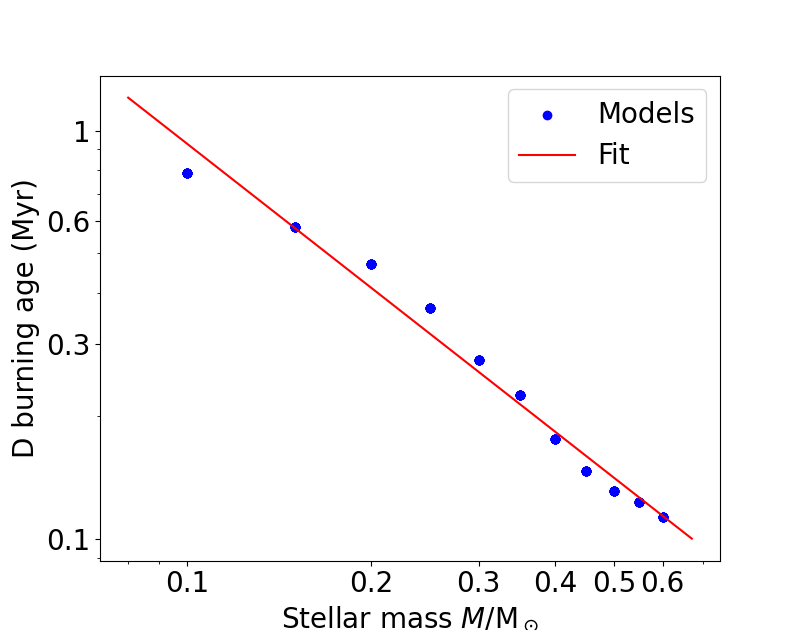

In [7]:
#Plot log-log
plt.figure(figsize=(8,6.3))

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Stellar mass $M/$M$_\odot$", fontsize=20)
plt.ylabel(r"D burning age (Myr)", fontsize=20)
plt.scatter(mm, tm/1e6, label="Models", c="blue")
plt.plot(mf, tf/1e6, c="red", label="Fit")
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6], ["0.1","0.2","0.3","0.4","0.5","0.6"], fontsize=20)
plt.yticks([0.1,0.3,0.6, 1], ["0.1","0.3","0.6","1"], fontsize=20)
plt.legend(fontsize=20)
plt.savefig("Dburning_log.jpg", dpi=300)
plt.show()